In [1]:
pip install facenet-pytorch

In [0]:
from facenet_pytorch import MTCNN, InceptionResnetV1
import torch
from torch.utils.data import DataLoader
from torchvision import datasets
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt 
import requests
from PIL import Image
import PIL.ImageOps



workers = 0 if os.name == 'nt' else 4
rostos = []

In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

Running on device: cuda:0


In [0]:
mtcnn = MTCNN(
    image_size=160, margin=0, min_face_size=20,
    thresholds=[0.6, 0.7, 0.7], factor=0.709, prewhiten=True,
    device=device
)

In [0]:
resnet = InceptionResnetV1(pretrained='vggface2').eval().to(device)

In [6]:
print(resnet)

InceptionResnetV1(
  (conv2d_1a): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_2a): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_2b): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (maxpool_3a): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2d_3b): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_4a): 

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
rostos = []

fp = open("/content/drive/My Drive/Colab_Notebooks/Resources/facialRecognition/data_teste_joao/CASO2/COMPARACAO/IMG_46681916.JPG","rb")
img = PIL.Image.open(fp)
rostos.append(img)

fp = open("/content/drive/My Drive/Colab_Notebooks/Resources/facialRecognition/data_teste_joao/CASO2/COMPARACAO/IMG_46681917.JPG","rb")
img = PIL.Image.open(fp)
rostos.append(img)

fp = open("/content/drive/My Drive/Colab_Notebooks/Resources/facialRecognition/data_teste_joao/CASO2/COMPARACAO/IMG_46681918.JPG","rb")
img = PIL.Image.open(fp)
rostos.append(img)

fp = open("/content/drive/My Drive/Colab_Notebooks/Resources/facialRecognition/data_teste_joao/CASO2/COMPARACAO/IMG_46681919.JPG","rb")
img = PIL.Image.open(fp)
rostos.append(img)



In [9]:
display(rostos)

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x480 at 0x7FF057BB2C50>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x480 at 0x7FF057B6CB00>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x480 at 0x7FF057BCEAC8>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x480 at 0x7FF057BCECC0>]

Face detected with probability: 0.999997
Face detected with probability: 0.999997
Face detected with probability: 0.999989
Face detected with probability: 0.998803
Face detected with probability: 0.999771
Face detected with probability: 0.999999
Face detected with probability: 0.999748
Face detected with probability: 0.999681
Face detected with probability: 0.999997
Face detected with probability: 0.999528
1
2
3
4
5
6
7
8
9
10


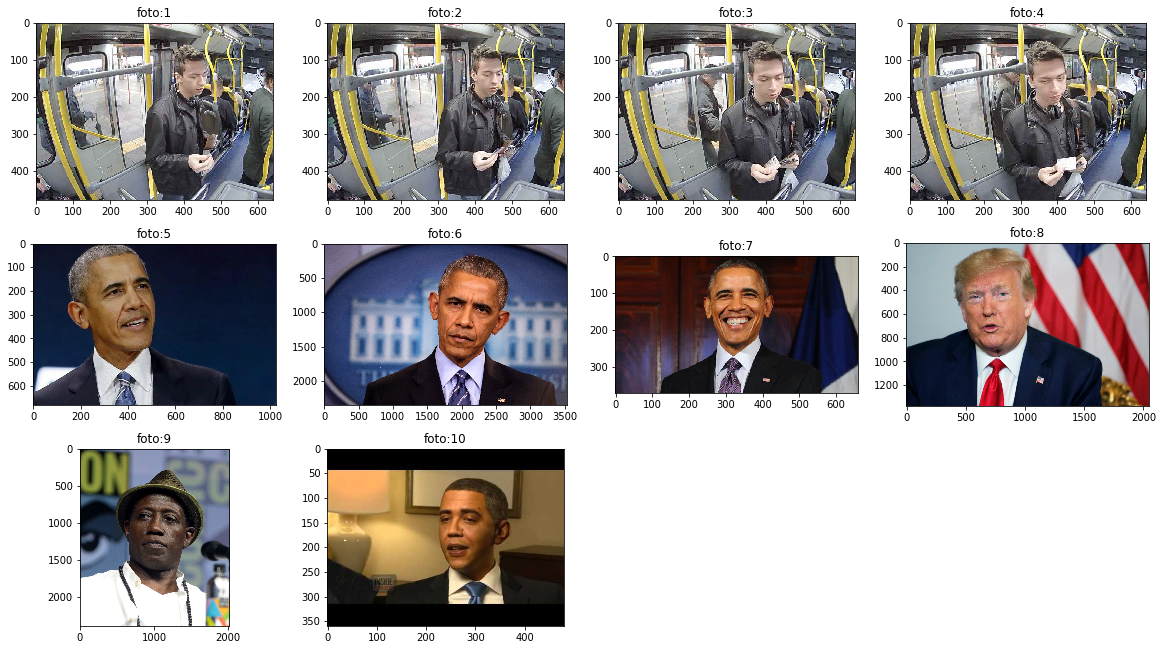

,Foto1,Foto2,Foto3,Foto4,Foto5,Foto6,Foto7,Foto8,Foto9,Foto10
Foto1,0.000000,0.569410,0.821126,0.810949,1.357875,1.319075,1.380426,1.358014,1.214945,1.297202
Foto2,0.569410,0.000000,0.819616,0.766689,1.307616,1.322386,1.359616,1.301185,1.313841,1.313582
Foto3,0.821126,0.819616,0.000000,0.599338,1.249063,1.176707,1.388147,1.350023,1.457716,1.333231
Foto4,0.810949,0.766689,0.599338,0.000000,1.298503,1.214549,1.408254,1.251586,1.402038,1.386616
Foto5,1.357875,1.307616,1.249063,1.298503,0.000000,0.722950,0.500982,1.411875,1.270504,1.074779
Foto6,1.319075,1.322386,1.176707,1.214549,0.722950,0.000000,0.738127,1.161525,1.219487,1.050918
Foto7,1.380426,1.359616,1.388147,1.408254,0.500982,0.738127,0.000000,1.341842,1.135802,0.994937
Foto8,1.358014,1.301185,1.350023,1.251586,1.411875,1.161525,1.341842,0.000000,1.250800,1.357943
Foto9,1.214945,1.313841,1.457716,1.402038,1.270504,1.219487,1.135802,1.250800,0.000000,1.164226
Foto10,1.297202,1.313582,1.333231,1.386616,1.074779,1.050918,0.994937,1.357943,1.164226,0.000000


In [10]:
import requests
from PIL import Image
import PIL.ImageOps


response = requests.get('https://www.estudarfora.org.br/app/uploads/2018/03/Obama-lan%C3%A7a-programa-de-bolsas-1024x683.jpg',stream = True)  
rostos.append(Image.open(response.raw))
response = requests.get('https://arc-anglerfish-arc2-prod-bostonglobe.s3.amazonaws.com/public/XVMCFHWNCQI6NNDVGPJ2GYUKZ4.jpg',stream = True)  
rostos.append(Image.open(response.raw))
response = requests.get('https://ichef.bbci.co.uk/news/660/cpsprodpb/E225/production/_93339875_obamalaughing.jpg',stream = True)  
rostos.append(Image.open(response.raw))
response = requests.get('https://imagens.publico.pt/imagens.aspx/1387875?tp=UH&db=IMAGENS&type=JPG',stream = True)  
rostos.append(Image.open(response.raw))
response = requests.get('https://upload.wikimedia.org/wikipedia/commons/7/73/Wesley_Snipes_%2841969097750%29_%28cropped%29.jpg',stream = True)  
rostos.append(Image.open(response.raw))
response = requests.get('https://i.ytimg.com/vi/xtAogk0Fnko/hqdefault.jpg',stream = True)  
rostos.append(Image.open(response.raw))





aligned = []
names = []
i=0

for x in rostos:   
    x_aligned, prob = mtcnn(x, return_prob=True)
    if x_aligned is not None:                
        aligned.append(x_aligned)
        i = i+1
        names.append('Foto'+str(i))  
        print('Face detected with probability: {:8f}'.format(prob))
        #names.append(dataset.idx_to_class[y])
        

ax = []

fig=plt.figure(figsize=(20, 15))
for i in range(1,len(rostos)+1):
    print(i)
    img = rostos[i-1]
    ax.append(fig.add_subplot(4,4,i))
    ax[-1].set_title("foto:"+str(i))
    plt.imshow(img)
    
plt.show()
        
aligned = torch.stack(aligned).to(device)
embeddings = resnet(aligned).detach().cpu()

dists = [[(e1 - e2).norm().item() for e2 in embeddings] for e1 in embeddings]
display(pd.DataFrame(dists, columns=names, index=names))